In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#iremos ver probabilidade, testes de hipótese e testes de normalidade

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/cursos-prouni.csv - cursos-prouni-2018-tratados.csv.csv',
                  sep=',', encoding='utf-8')
df

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,universidade_nome,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,Universidade Cidade de São Paulo - UNICID,Medicina,739.62,738.08,738.96,718.64
1,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,Faculdade Barão do Rio Branco - FAB,Medicina,758.32,723.94,734.92,711.26
2,Bacharelado,Integral,9023.07,4.0,4.0,5.0,5.0,65921511844324,Medicina,Itaperuna,RJ,Faculdade Redentor - FACREDENTOR,Medicina,741.06,729.02,730.98,722.82
3,Bacharelado,Integral,8508.54,2.0,1.0,7.0,2.0,104123711716094,Medicina,Belem,PA,Faculdade Metropolitana da Amazônia - FAMAZ,Medicina,741.36,739.90,760.80,715.10
4,Bacharelado,Integral,8281.38,3.0,1.0,6.0,2.0,105887911921884,Medicina,Imperatriz,MA,Universidade do Ceuma - Uniceuma - UNICEUMA,Medicina,756.46,737.88,747.14,717.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,Bacharelado,Curso a Distância,189.00,1.0,2.0,1.0,3.0,65991211887475,Teologia,Sao Paulo,SP,Faculdade Messianica,Teologia,584.34,450.00,489.28,450.00
2199,Bacharelado,Curso a Distância,189.00,1.0,1.0,1.0,3.0,104980411887475,Teologia,Sao Paulo,SP,Faculdade Messianica,Teologia,450.00,450.00,450.00,450.00
2200,Licenciatura,Curso a Distância,189.00,1.0,1.0,1.0,3.0,65991213655645,Pedagogia,Sao Paulo,SP,Faculdade Messianica,Pedagogia,497.78,506.78,508.48,451.78
2201,Tecnológico,Noturno,188.00,1.0,2.0,1.0,9.0,65868713317703,Gestão da Qualidade,Sao VIcente,SP,Faculdade de São VIcente - FSV,Gestão da Qualidade,456.66,450.00,450.00,450.00


In [ ]:
cursos_sp = df.loc[df.cidade_busca == 'Sao Paulo']

In [ ]:
cursos_sp.head()

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,universidade_nome,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,Universidade Cidade de São Paulo - UNICID,Medicina,739.62,738.08,738.96,718.64
6,Bacharelado,Integral,8200.00,2.0,3.0,4.0,7.0,105596711902804,Medicina,Sao Paulo,SP,Faculdade das Américas - FAM,Medicina,735.84,724.70,738.42,723.28
29,Tecnológico,Vespertino,2299.00,1.0,1.0,1.0,3.0,659695725572,Gastronomia,Sao Paulo,SP,Centro Universitário Senac - SENACSP,Gastronomia,666.24,633.40,622.36,563.02
30,Tecnológico,Noturno,2299.00,1.0,3.0,2.0,3.0,659695725573,Gastronomia,Sao Paulo,SP,Centro Universitário Senac - SENACSP,Gastronomia,671.98,632.80,594.20,501.66
40,Bacharelado,Matutino,2173.84,1.0,2.0,1.0,2.0,100232885791,Odontologia,Sao Paulo,SP,Universidade Cidade de São Paulo - UNICID,Odontologia,659.42,652.90,587.92,606.26


In [ ]:
cursos_cwb = df.loc[df.cidade_busca == 'Curitiba']

In [ ]:
cursos_cwb.head()

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,universidade_nome,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
49,Bacharelado,Noturno,1998.14,1.0,1.0,1.0,1.0,333421069403,Engenharia Mecânica,Curitiba,PR,Fae Centro Universitário - FAE,Engenharia Mecânica,648.60,623.16,639.56,541.16
59,Bacharelado,Matutino,1974.00,2.0,5.0,3.0,7.0,65955614098351,Medicina Veterinária,Curitiba,PR,Centro Universitário Autônomo do Brasil - Unib...,Medicina Veterinária,641.98,601.86,615.90,595.76
101,Bacharelado,Matutino,1629.14,1.0,1.0,1.0,2.0,333421102981,Psicologia,Curitiba,PR,Fae Centro Universitário - FAE,Psicologia,636.60,638.20,622.40,573.90
102,Bacharelado,Noturno,1629.14,1.0,1.0,1.0,1.0,333421102983,Psicologia,Curitiba,PR,Fae Centro Universitário - FAE,Psicologia,630.88,616.06,686.06,599.32
160,Bacharelado,Noturno,1451.60,1.0,2.0,1.0,4.0,659556968573,Psicologia,Curitiba,PR,Centro Universitário Autônomo do Brasil - Unib...,Psicologia,649.72,632.82,616.42,595.12


In [ ]:
cursos_sp.shape

(373, 17)

In [ ]:
cursos_cwb.shape

(87, 17)

In [ ]:
len(cursos_sp)

373

In [ ]:
len(cursos_cwb)

87

In [ ]:
len(df)

2203

In [ ]:
def probab (A, E):
  resultado = (A / E)*100 
  print('{:.2f}'.format(resultado))

In [ ]:
#probabilidade de achar um curso em sp
probab (len(cursos_sp), len(df))

16.93


In [ ]:
#probabilidade de achar um curso em curitiba
probab (len(cursos_cwb), len(df))

3.95


In [ ]:
def probab_nao (A, E):
  resultado = (1- (A / E))*100 
  print('{:.2f}'.format(resultado))

In [ ]:
#probabilidade de não achar um curso em curitiba
probab_nao (len(cursos_cwb), len(df))

96.05


In [ ]:
#probabilidade de não achar um curso em curitiba e nem em sp
probab_nao (len(cursos_cwb)+len(cursos_sp), len(df))

79.12


In [ ]:
#teste de hipóteses

df

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,universidade_nome,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,Universidade Cidade de São Paulo - UNICID,Medicina,739.62,738.08,738.96,718.64
1,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,Faculdade Barão do Rio Branco - FAB,Medicina,758.32,723.94,734.92,711.26
2,Bacharelado,Integral,9023.07,4.0,4.0,5.0,5.0,65921511844324,Medicina,Itaperuna,RJ,Faculdade Redentor - FACREDENTOR,Medicina,741.06,729.02,730.98,722.82
3,Bacharelado,Integral,8508.54,2.0,1.0,7.0,2.0,104123711716094,Medicina,Belem,PA,Faculdade Metropolitana da Amazônia - FAMAZ,Medicina,741.36,739.90,760.80,715.10
4,Bacharelado,Integral,8281.38,3.0,1.0,6.0,2.0,105887911921884,Medicina,Imperatriz,MA,Universidade do Ceuma - Uniceuma - UNICEUMA,Medicina,756.46,737.88,747.14,717.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,Bacharelado,Curso a Distância,189.00,1.0,2.0,1.0,3.0,65991211887475,Teologia,Sao Paulo,SP,Faculdade Messianica,Teologia,584.34,450.00,489.28,450.00
2199,Bacharelado,Curso a Distância,189.00,1.0,1.0,1.0,3.0,104980411887475,Teologia,Sao Paulo,SP,Faculdade Messianica,Teologia,450.00,450.00,450.00,450.00
2200,Licenciatura,Curso a Distância,189.00,1.0,1.0,1.0,3.0,65991213655645,Pedagogia,Sao Paulo,SP,Faculdade Messianica,Pedagogia,497.78,506.78,508.48,451.78
2201,Tecnológico,Noturno,188.00,1.0,2.0,1.0,9.0,65868713317703,Gestão da Qualidade,Sao VIcente,SP,Faculdade de São VIcente - FSV,Gestão da Qualidade,456.66,450.00,450.00,450.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2203 entries, 0 to 2202
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   grau                  2203 non-null   object 
 1   turno                 2203 non-null   object 
 2   mensalidade           2203 non-null   float64
 3   bolsa_integral_cotas  2203 non-null   float64
 4   bolsa_integral_ampla  2203 non-null   float64
 5   bolsa_parcial_cotas   2203 non-null   float64
 6   bolsa_parcial_ampla   2203 non-null   float64
 7   curso_id              2203 non-null   int64  
 8   curso_busca           2203 non-null   object 
 9   cidade_busca          2203 non-null   object 
 10  uf_busca              2203 non-null   object 
 11  universidade_nome     2203 non-null   object 
 12  nome                  2203 non-null   object 
 13  nota_integral_ampla   2203 non-null   float64
 14  nota_integral_cotas   2203 non-null   float64
 15  nota_parcial_ampla   

In [ ]:
universidadex = df.loc[df.universidade_nome == 'Universidade Cidade de São Paulo - UNICID']
universidadex.shape

(97, 17)

In [ ]:
universidadex.dtypes

grau                     object
turno                    object
mensalidade             float64
bolsa_integral_cotas    float64
bolsa_integral_ampla    float64
bolsa_parcial_cotas     float64
bolsa_parcial_ampla     float64
curso_id                  int64
curso_busca              object
cidade_busca             object
uf_busca                 object
universidade_nome        object
nome                     object
nota_integral_ampla     float64
nota_integral_cotas     float64
nota_parcial_ampla      float64
nota_parcial_cotas      float64
dtype: object

In [ ]:
universidadex.isnull().sum()

grau                    0
turno                   0
mensalidade             0
bolsa_integral_cotas    0
bolsa_integral_ampla    0
bolsa_parcial_cotas     0
bolsa_parcial_ampla     0
curso_id                0
curso_busca             0
cidade_busca            0
uf_busca                0
universidade_nome       0
nome                    0
nota_integral_ampla     0
nota_integral_cotas     0
nota_parcial_ampla      0
nota_parcial_cotas      0
dtype: int64

In [ ]:
import plotly.express as px
grafico = px.box(universidadex, y="nota_integral_cotas")
grafico.show()

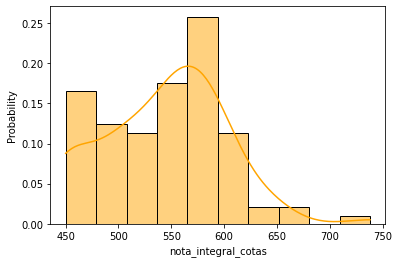

In [ ]:
import seaborn as sns
sns.histplot(universidadex, x='nota_integral_cotas', bins=10, color="orange", kde=True, stat="probability");

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

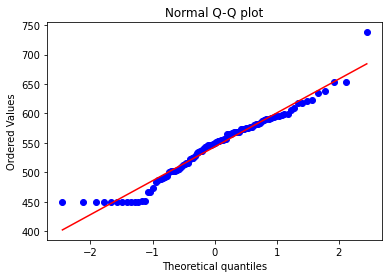

In [ ]:
stats.probplot(universidadex['nota_integral_cotas'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
#teste shapiro-wilk
stats.shapiro(universidadex.nota_integral_cotas)

ShapiroResult(statistic=0.960903525352478, pvalue=0.005558077711611986)

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
#teste lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(universidadex.nota_integral_cotas, dist = 'norm')

(0.07680676895489194, 0.19121427549644532)

In [ ]:
#média das notas (integral cotas) da universidade x, comparada a média do estado do PR

from statsmodels.stats.weightstats import ztest

In [ ]:
df.nota_integral_cotas.describe()

count    2203.000000
mean      574.097921
std        59.868058
min       450.000000
25%       542.290000
50%       583.320000
75%       614.340000
max       792.240000
Name: nota_integral_cotas, dtype: float64

In [ ]:
stat, p = ztest(universidadex['nota_integral_cotas'], value=574.097921, )
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: -5.25
p-valor: 1.5078266978831178e-07


In [ ]:
universidadex.nota_integral_cotas.describe()

count     97.000000
mean     543.279175
std       57.797505
min      450.000000
25%      501.680000
50%      550.420000
75%      581.320000
max      738.080000
Name: nota_integral_cotas, dtype: float64

In [ ]:
#teste estatístico: z = -5,25

#p_valor = 1.50e-07

In [ ]:
#teste de normalidade

df

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,universidade_nome,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,Universidade Cidade de São Paulo - UNICID,Medicina,739.62,738.08,738.96,718.64
1,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,Faculdade Barão do Rio Branco - FAB,Medicina,758.32,723.94,734.92,711.26
2,Bacharelado,Integral,9023.07,4.0,4.0,5.0,5.0,65921511844324,Medicina,Itaperuna,RJ,Faculdade Redentor - FACREDENTOR,Medicina,741.06,729.02,730.98,722.82
3,Bacharelado,Integral,8508.54,2.0,1.0,7.0,2.0,104123711716094,Medicina,Belem,PA,Faculdade Metropolitana da Amazônia - FAMAZ,Medicina,741.36,739.90,760.80,715.10
4,Bacharelado,Integral,8281.38,3.0,1.0,6.0,2.0,105887911921884,Medicina,Imperatriz,MA,Universidade do Ceuma - Uniceuma - UNICEUMA,Medicina,756.46,737.88,747.14,717.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,Bacharelado,Curso a Distância,189.00,1.0,2.0,1.0,3.0,65991211887475,Teologia,Sao Paulo,SP,Faculdade Messianica,Teologia,584.34,450.00,489.28,450.00
2199,Bacharelado,Curso a Distância,189.00,1.0,1.0,1.0,3.0,104980411887475,Teologia,Sao Paulo,SP,Faculdade Messianica,Teologia,450.00,450.00,450.00,450.00
2200,Licenciatura,Curso a Distância,189.00,1.0,1.0,1.0,3.0,65991213655645,Pedagogia,Sao Paulo,SP,Faculdade Messianica,Pedagogia,497.78,506.78,508.48,451.78
2201,Tecnológico,Noturno,188.00,1.0,2.0,1.0,9.0,65868713317703,Gestão da Qualidade,Sao VIcente,SP,Faculdade de São VIcente - FSV,Gestão da Qualidade,456.66,450.00,450.00,450.00


In [ ]:
df_brasilia = df.loc[df.cidade_busca == 'Brasilia']

In [ ]:
df_brasilia.shape

(87, 17)

In [ ]:
df_brasilia.head()

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,universidade_nome,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
36,Bacharelado,Matutino,2221.36,1.0,1.0,4.0,3.0,103756311578501,Odontologia,Brasilia,DF,Centro Universitário do Distrito Federal - Udf...,Odontologia,685.36,667.86,649.80,632.00
37,Bacharelado,Noturno,2221.36,1.0,1.0,2.0,1.0,103756311578503,Odontologia,Brasilia,DF,Centro Universitário do Distrito Federal - Udf...,Odontologia,714.18,691.50,654.58,609.26
79,Bacharelado,Noturno,1783.25,1.0,1.0,2.0,27.0,106582512635903,Fisioterapia,Brasilia,DF,Faculdade Jk Brasília Asa Sul II - JK,Fisioterapia,643.58,623.30,450.00,517.18
80,Bacharelado,Noturno,1783.25,1.0,1.0,2.0,22.0,106582512635893,Enfermagem,Brasilia,DF,Faculdade Jk Brasília Asa Sul II - JK,Enfermagem,619.34,588.92,450.00,450.00
117,Bacharelado,Matutino,1575.00,3.0,3.0,4.0,4.0,13759010577671,Direito,Brasilia,DF,Escola de Direito de Brasília - EDB,Direito,687.12,660.50,649.68,606.72


In [ ]:
#histograma

import plotly.express as px
grafico =  px.histogram (df_brasilia,  x = "nota_integral_ampla", nbins=32, histnorm='percent',) 
grafico.update_layout(width=400,height=400,title_text='Distribuição de notas (integrais amplas)') 
grafico.show()

In [ ]:
import plotly.express as px
grafico =  px.histogram (df,  x = "nota_integral_ampla", nbins=32, histnorm='percent',) 
grafico.update_layout(width=400,height=400,title_text='Distribuição de notas (integrais amplas)') 
grafico.show()

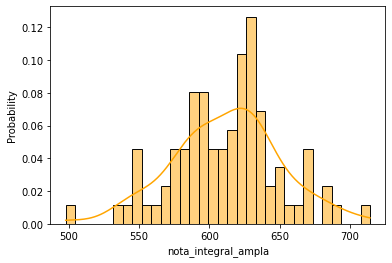

In [ ]:
import seaborn as sns
sns.histplot(df_brasilia, x='nota_integral_ampla', bins=32, color="orange", kde=True, stat="probability");

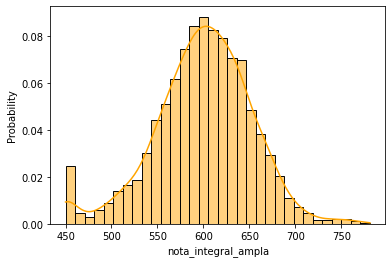

In [ ]:
import seaborn as sns
sns.histplot(df, x='nota_integral_ampla', bins=32, color="orange", kde=True, stat="probability");

In [ ]:
#qqplot

import scipy.stats as stats
import matplotlib.pyplot as plt

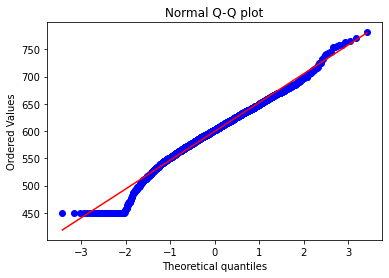

In [ ]:
stats.probplot(df['nota_integral_ampla'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

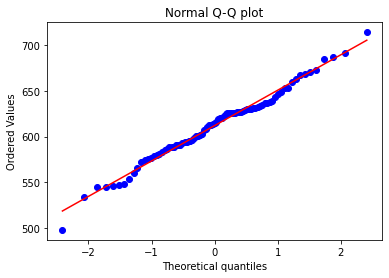

In [ ]:
stats.probplot(df_brasilia['nota_integral_ampla'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
#teste de shapiro_wilk
stats.shapiro(df_brasilia.nota_integral_ampla)

ShapiroResult(statistic=0.9890588521957397, pvalue=0.6837945580482483)

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
statsmodels.stats.diagnostic.lilliefors(df_brasilia.nota_integral_ampla, dist = 'norm')

(0.0703049635323868, 0.414618712546165)

In [ ]:
#teste lilliefors (kolmogorov_sminorv)
statsmodels.stats.diagnostic.lilliefors(df_brasilia.nota_integral_ampla, dist = 'norm')

(0.0703049635323868, 0.414618712546165)